In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
%matplotlib inline


In [26]:
dataframe = pd.read_csv(r"D:/Ml_Lab_Programs/datasets/weather.csv")

In [27]:
dataframe.dtypes

outlook        object
temperature    object
humidity       object
windy            bool
play           object
dtype: object

In [28]:
#need to encode categorical columns
encoder = LabelEncoder()
for column in dataframe.columns:
    dataframe[column]=encoder.fit_transform(dataframe[column])

dataframe

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [29]:
y = dataframe['play']
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int32

In [30]:
x = dataframe.drop('play',axis=1)
x

,outlook,temperature,humidity,windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


C:\Users\adarshpatel\AppData\Local\Temp\ipykernel_16036\952845963.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['overcast','rainy','sunny'])


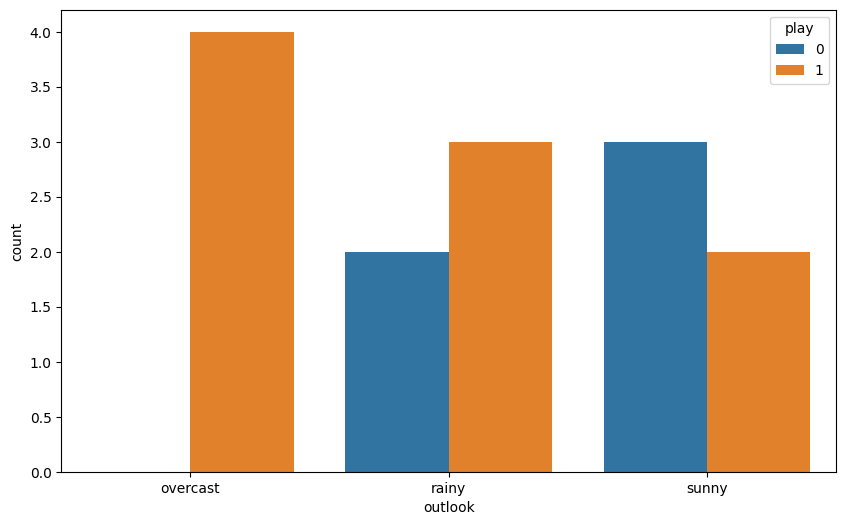

In [42]:
#count plot for outlook vs play
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dataframe['outlook'],hue=dataframe['play'])
ax.set_xticklabels(['overcast','rainy','sunny'])
plt.show()

C:\Users\adarshpatel\AppData\Local\Temp\ipykernel_16036\1685997070.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cool','hot','mild'])


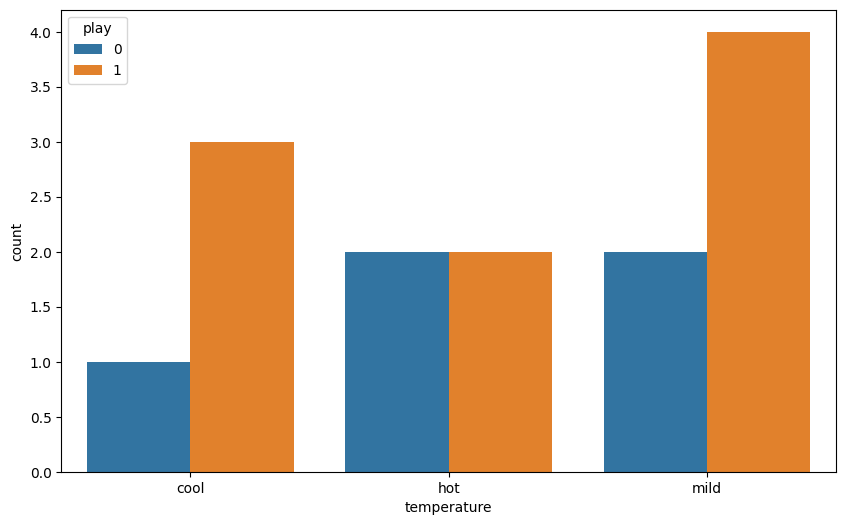

In [41]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dataframe['temperature'],hue=dataframe['play'])
ax.set_xticklabels(['cool','hot','mild'])
plt.show()

C:\Users\adarshpatel\AppData\Local\Temp\ipykernel_16036\529363713.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high','normal'])


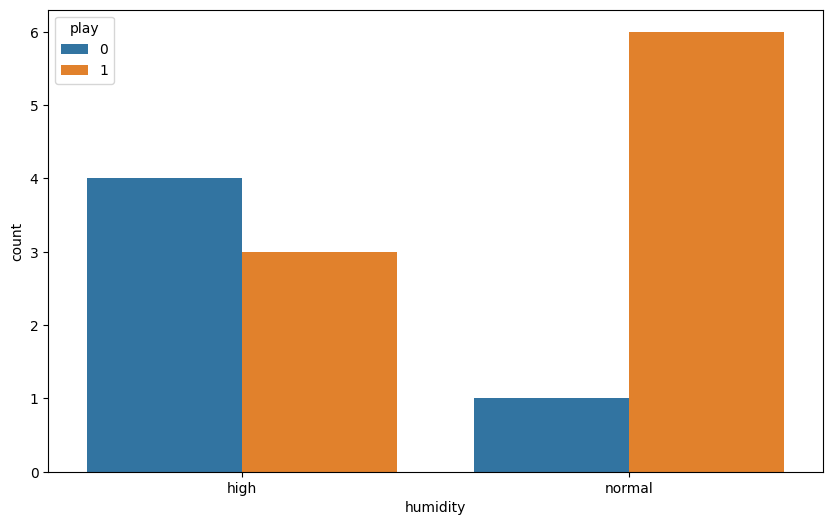

In [39]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dataframe['humidity'],hue=dataframe['play'])
ax.set_xticklabels(['high','normal'])
plt.show()

C:\Users\adarshpatel\AppData\Local\Temp\ipykernel_16036\509454284.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['False','True'])


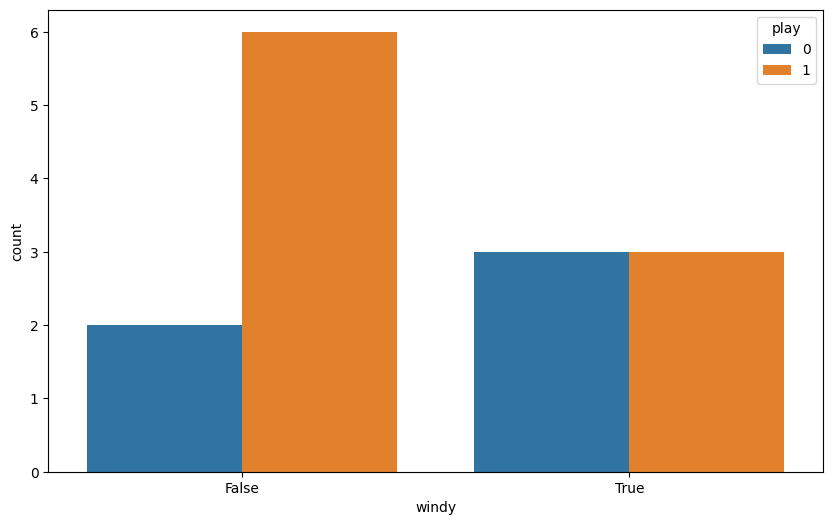

In [38]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dataframe['windy'],hue=dataframe['play'])
ax.set_xticklabels(['False','True'])
plt.show()

<Axes: >

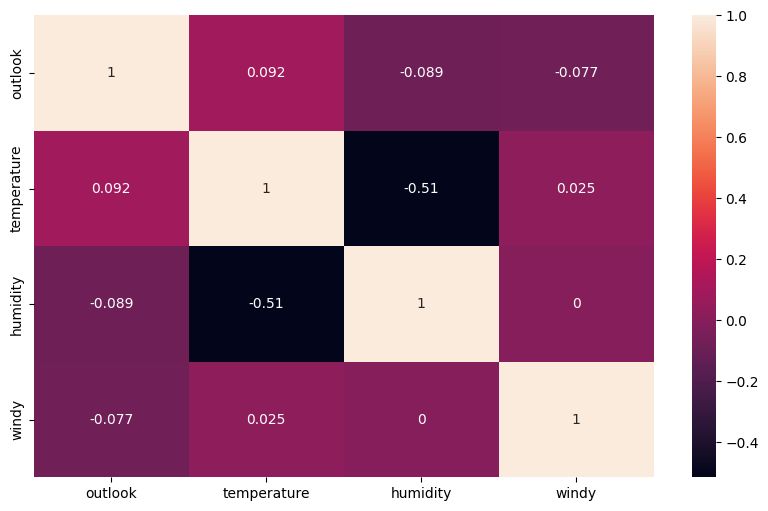

In [43]:
#Heat map 
correlationmatrix = x.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlationmatrix,annot=True)

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,test_size=.3,random_state=32)

In [131]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=32)
classifier.fit(x_train,y_train)

y_prediction = classifier.predict(x_test)
y_prediction

array([1, 0, 1, 0, 0])

In [132]:
accuracy = accuracy_score(y_test,y_prediction)
score = f1_score(y_test,y_prediction)
print(f"accuracy is {accuracy:.3f}")
print(f" f1 score is {score:.3f}")

accuracy is 0.600
 f1 score is 0.667


[]

<Figure size 1000x600 with 0 Axes>

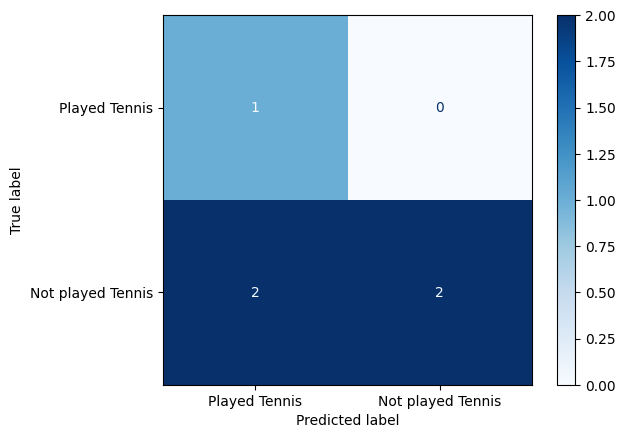

In [133]:
matrix = confusion_matrix(y_test,y_prediction)
plt.figure(figsize=(10,6))
display = ConfusionMatrixDisplay(confusion_matrix = matrix,display_labels=['Played Tennis','Not played Tennis'])
display.plot(cmap = plt.cm.Blues)
plt.plot()

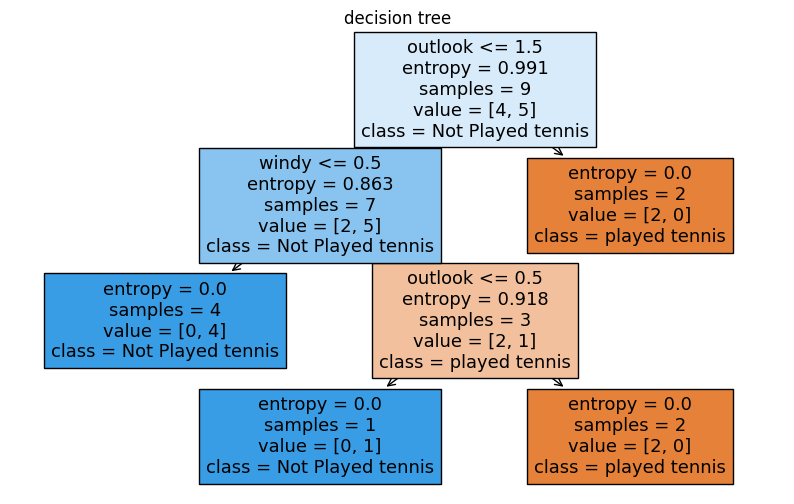

In [134]:
#visualizing decision tree

plt.figure(figsize=(10,6))
plot_tree(classifier,feature_names = x.columns.to_list(),class_names = ['played tennis','Not Played tennis'],filled=True)
plt.title('decision tree')
plt.show()